<a href="https://colab.research.google.com/github/lalitpandey02/PythonNotebooks/blob/main/NN_Practice_16_10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical # this function is to prepare your supervision (y) for multi class problems, this converts the y vector to one hot encoded y vector

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(2)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_features, train_labels),(test_features, test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_features.shape

(60000, 28, 28)

In [ ]:
test_features.shape

(10000, 28, 28)

In [ ]:
import pandas as pd

In [ ]:
num_classes=pd.Series(train_labels).nunique()

In [ ]:
train_features[0].shape

(28, 28)

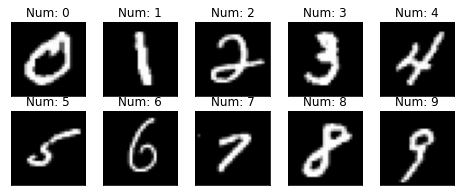

In [ ]:
fig=plt.figure(figsize=(8,3))
for i in range(num_classes):
  ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
  features_idx=train_features[train_labels[:]==i,:] # give me all the images which have the "i" label
  ax.set_title("Num: "+str(i))
  plt.imshow(features_idx[1],cmap='gray') #plot the image at the first index
plt.show()

In [ ]:
# we are solving a multiclassification problem where in given an image i want to classify whether it falls in (0,9) classes

In [ ]:
train_features.shape

(60000, 784)

In [ ]:
train_features=train_features.reshape(train_features.shape[0],28*28)

In [ ]:
test_features=test_features.reshape(test_features.shape[0],28*28)

In [ ]:
train_labels=to_categorical(train_labels,num_classes)
test_labels=to_categorical(test_labels,num_classes)


In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_features.shape

(60000, 784)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=0),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]

Epoch 1/100
75/75 [==============================] - 1s 12ms/step - loss: 1.1557 - accuracy: 0.6815 - val_loss: 0.6148 - val_accuracy: 0.8548
Epoch 2/100
75/75 [==============================] - 1s 10ms/step - loss: 0.5198 - accuracy: 0.8662 - val_loss: 0.4066 - val_accuracy: 0.8922


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


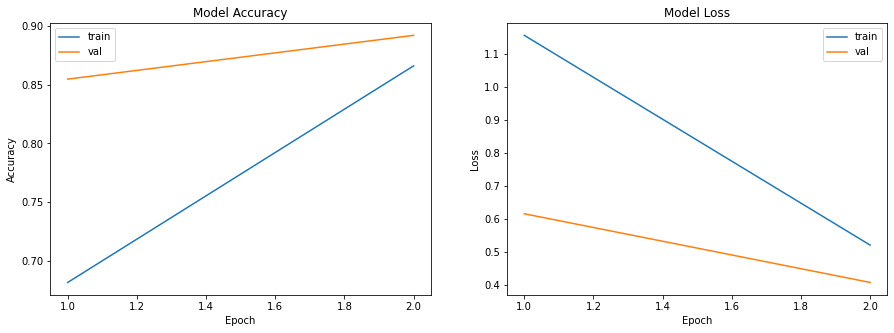

In [ ]:
model=Sequential()
model.add(Dense(100,input_dim=784,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(25,activation='tanh'))
model.add(Dense(10,activation='softmax'))
sgd=Adam(lr=0.001)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model_info=model.fit(train_features,train_labels,batch_size=640,epochs=100,validation_split=0.2,callbacks=my_callbacks)
plot_model_history(model_info)

In [ ]:
sgd=SGD(lr=0.01)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_info=model.fit(train_features,train_labels,batch_size=640,epochs=10,validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 1s 10ms/step - loss: 0.3773 - accuracy: 0.8854 - val_loss: 0.3440 - val_accuracy: 0.8966
Epoch 2/10
75/75 [==============================] - 1s 10ms/step - loss: 0.3536 - accuracy: 0.8945 - val_loss: 0.3269 - val_accuracy: 0.9020
Epoch 3/10
75/75 [==============================] - 1s 10ms/step - loss: 0.3376 - accuracy: 0.8985 - val_loss: 0.3181 - val_accuracy: 0.9062
Epoch 4/10
75/75 [==============================] - 1s 10ms/step - loss: 0.3234 - accuracy: 0.9037 - val_loss: 0.3069 - val_accuracy: 0.9090
Epoch 5/10
75/75 [==============================] - 1s 10ms/step - loss: 0.3118 - accuracy: 0.9077 - val_loss: 0.2993 - val_accuracy: 0.9125
Epoch 6/10
75/75 [==============================] - 1s 10ms/step - loss: 0.3036 - accuracy: 0.9091 - val_loss: 0.2937 - val_accuracy: 0.9136
Epoch 7/10
75/75 [==============================] - 1s 10ms/step - loss: 0.2945 - accuracy: 0.9129 - val_loss: 0.2845 - val_accuracy: 0.9150
Epoch 8/10
75

In [ ]:
model=keras.load_model("best.h5")

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


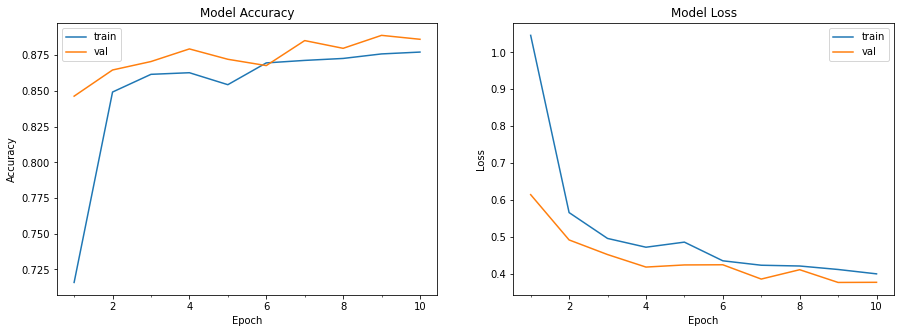

In [ ]:
plot_model_history(model_info)

In [ ]:
results=model.predict(test_features)

313/313 [==============================] - 0s 1ms/step


In [ ]:
np.argmax(results,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

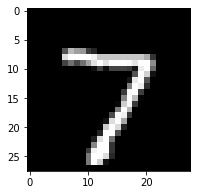

In [ ]:
fig=plt.figure(figsize=(8,3))
plt.imshow(test_features[0].reshape(28,28),cmap='gray')